# Travail final 
## Moïra Rault-Bélisle

### Objectif  
Voir si le salaire varie en fonction de deux variables, le sexe et la classe ethnique, selon la base de données income.

### Hypothèses  
- Le salaire diffère en fonction du sexe.
- Le salaire diffère en fonction de l'ethnie. 

### Importation des modules nécessaires et de la base de données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.formula.api import ols
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Lecture du fichier income.xlsx

In [2]:
income = pd.read_excel('C:/Users/Admin/OneDrive - Universite de Montreal/Documents/Université/Hiver 2021/PSY4016/income.xlsx')

## Hypothèse 1 

### Encodage de la variable income en integer
Choix de la médiance de chaque intervalle (min 0 et max 100 000 pour l'échantillon)

Encodage de la variable income en premier lieu afin de pouvoir faire des analyses descriptives

In [3]:
income_final = income.replace(['-10.000)','[10.000-15.000)','[15.000-20.000)','[20.000-25.000)','[25.000-30.000)',
                             '[30.000-40.000)','[40.000-50.000)','[50.000-75.000)','[75.000-'],[5000,12500,17500,22500,
                                                                                                27500,35000,45000,57500,87500])

### Analyses descriptives

In [4]:
income_final.describe()

,Unnamed: 0,INCOME
count,8993.000000,8993.000000
mean,4496.000000,33720.393639
std,2596.199819,24766.775067
min,0.000000,5000.000000
25%,2248.000000,12500.000000
50%,4496.000000,27500.000000
75%,6744.000000,45000.000000
max,8992.000000,87500.000000


<AxesSubplot:xlabel='INCOME', ylabel='Count'>

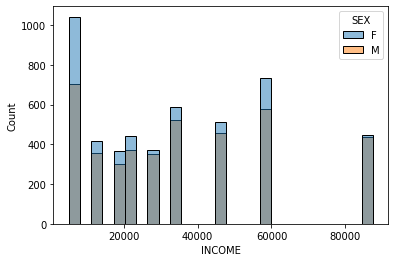

In [5]:
sns.histplot(data = income_final, x = 'INCOME', hue = "SEX")

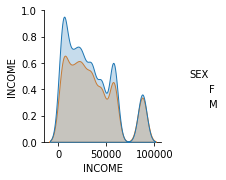

In [6]:
sns.pairplot(income_final, vars=['INCOME'],
                  kind='reg', hue='SEX')

### Prétraitement des données

#### Encodage d'étiquettes

La variable income a été transformée plus haut. 

##### Encodage de la variable sex en variable binaire

In [7]:
le = preprocessing.LabelEncoder()

In [8]:
le.fit(income_final.SEX)

LabelEncoder()

In [9]:
sex_binaire = le.transform(income_final.SEX)

In [10]:
income_final['SEX'] = sex_binaire

#### Normalisation des données

In [11]:
#Vérification normalité de salaire
income_shapiro = stats.shapiro(income_final['INCOME'])
print(income_shapiro)

ShapiroResult(statistic=0.8923608660697937, pvalue=0.0)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [12]:
scaler = sklearn.preprocessing.StandardScaler()

In [13]:
X_data = income_final[["INCOME"]]
scaled = scaler.fit(X_data)

In [14]:
transformed = scaler.transform(X_data)
transformed

array([[ 2.17156237],
       [ 2.17156237],
       [ 2.17156237],
       ...,
       [-1.15969845],
       [-0.45306737],
       [ 0.05166912]])

In [15]:
income_final['INCOME'] = transformed

#### Imputation des valeurs manquantes

In [16]:
income_final['SEX'].isnull().values.any()

False

In [17]:
income_final['INCOME'].isnull().values.any()

False

### Analyses statistiques

In [18]:
#Analyses statistiques hypothèse 1
femme_income = income_final[income_final['SEX'] == 0]['INCOME']
homme_income = income_final[income_final['SEX'] == 1]['INCOME']

stats.ttest_ind(femme_income, homme_income)

Ttest_indResult(statistic=-3.4591910614580033, pvalue=0.0005443128938253274)

## Hypothèse 2

### Analyses descriptives

In [19]:
#Analyses descriptives hypothèse 2
income_eth = income_final.groupby(['INCOME', 'ETHNIC.CLASS']).describe()
descr = []
for valeur in income_eth:
    descr.append(income_eth[valeur])
descr

[INCOME     ETHNIC.CLASS    
 -1.159698  American Indian      37.0
            Asian               118.0
            Black               196.0
            East Indian           8.0
            Hispanic            335.0
                                ...  
  2.171562  Black                39.0
            Hispanic             30.0
            Other                20.0
            Pacific Islander     10.0
            White               713.0
 Name: (Unnamed: 0, count), Length: 68, dtype: float64,
 INCOME     ETHNIC.CLASS    
 -1.159698  American Indian     4228.972973
            Asian               4755.127119
            Black               3618.857143
            East Indian         4533.875000
            Hispanic            4785.800000
                                   ...     
  2.171562  Black               4109.589744
            Hispanic            4942.266667
            Other               5651.150000
            Pacific Islander    4204.500000
            White           

<AxesSubplot:xlabel='INCOME', ylabel='Count'>

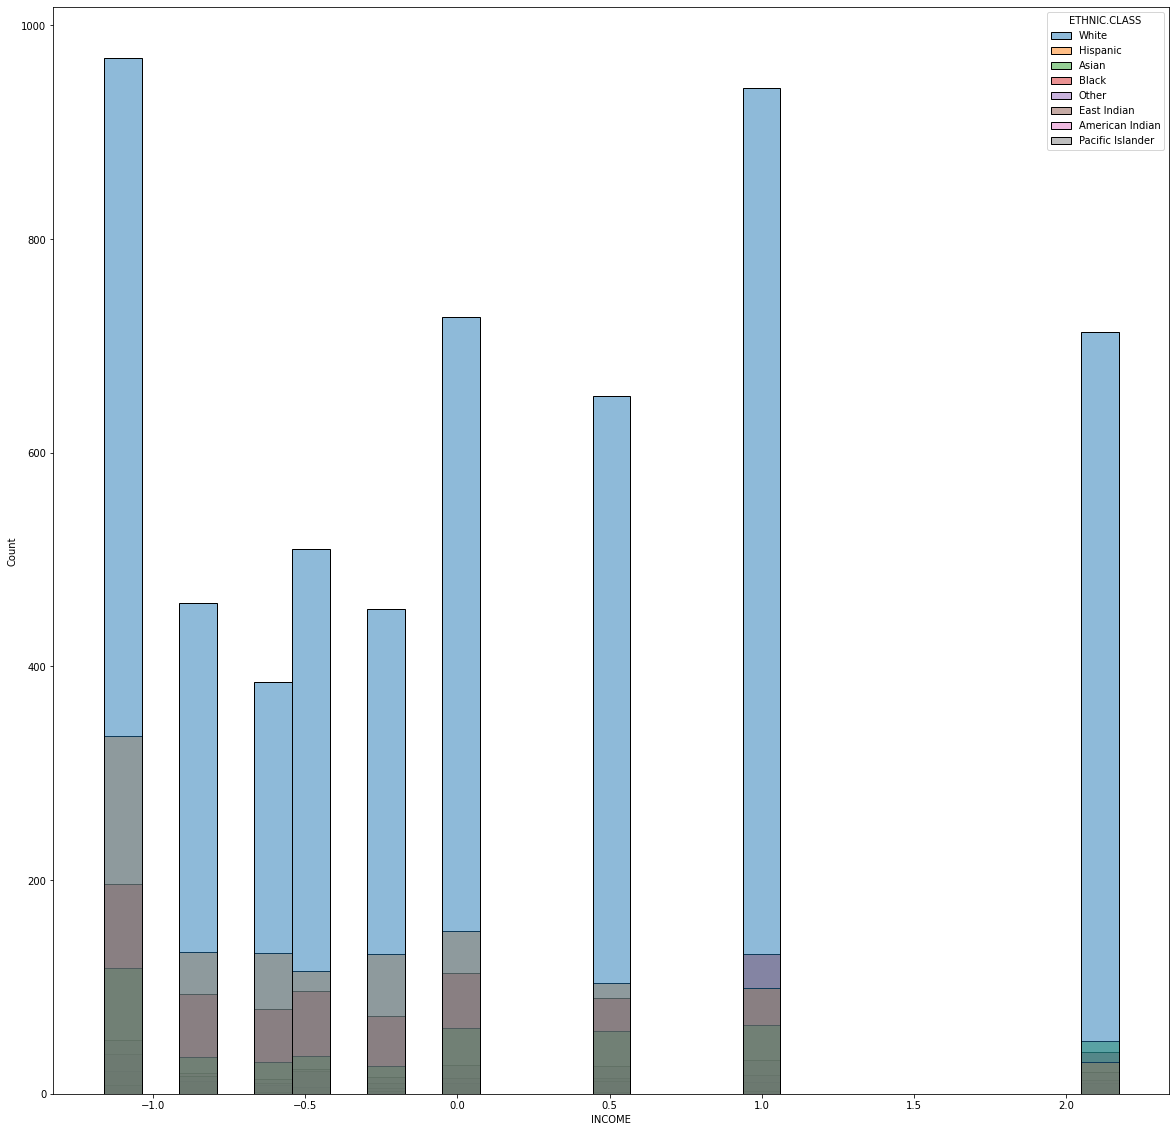

In [20]:
fig_dims = (20,20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data = income_final, x = 'INCOME', hue = "ETHNIC.CLASS", ax=ax)

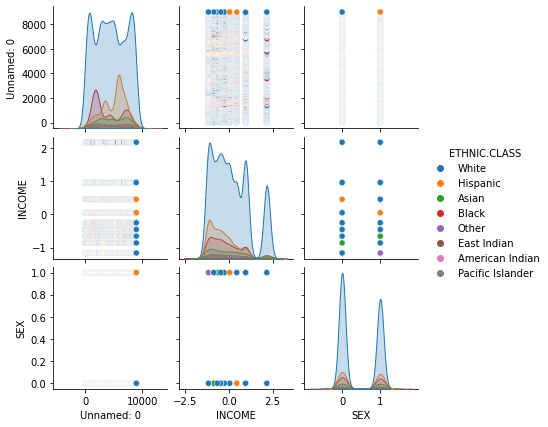

In [21]:
sns.pairplot(income_final, hue='ETHNIC.CLASS', height=2)

### Prétraitement des données

#### Encodage de données

L'encodage de données et la normalisation ont déjà été faites pour la variable income.

##### Encodage pour la variable classe ethnique

In [22]:
income_final = income_final.rename(columns={'ETHNIC.CLASS': 'ETH'})

In [23]:
le.fit(income_final.ETH)

LabelEncoder()

In [24]:
ETH_norm = le.transform(income_final.ETH)

In [25]:
income_final['ETH'] = ETH_norm

#### Imputation des valeurs manquantes

In [26]:
income_final['ETH'].isnull().values.any()

False

### Analyses statistiques

In [27]:
#Analyses statistiques hypothèse 2
model = ols('ETH ~ INCOME', income_final).fit()

model.params

Intercept    5.586456
INCOME       0.276277
dtype: float64

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ETH   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           2.76e-34
Time:                        20:24:12   Log-Likelihood:                -19588.
No. Observations:                8993   AIC:                         3.918e+04
Df Residuals:                    8991   BIC:                         3.919e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5865      0.023    247.920      0.0

## Apprentissage supervisé

Utilisation de l'analyse discriminante linéaire (ADL) 

### Étape 1: Calcul des vecteurs moyens de dimension d

Calculer les vecteurs moyens d-dimensionnels pour les différentes classes de l'ensemble de données.

In [29]:
sex = income_final['SEX'].values
ethn = income_final['ETH'].values
income_sex_eth = pd.DataFrame(columns = ['SEX','ETH'], index=income_final['INCOME'])
income_sex_eth['SEX'] = sex
income_sex_eth['ETH'] = ethn

In [30]:
x = np.array(income_sex_eth.iloc[:, 0:2])
y = income_final['INCOME'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

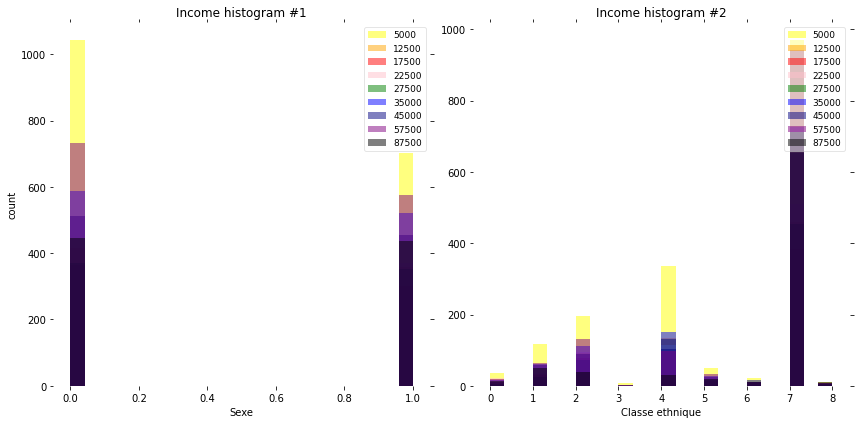

In [31]:
feature_dict = {i:label for i,label in zip(
                range(2),
                  ('Sexe',
                  'Classe ethnique'))}
label_dict = {1 : 5000, 2: 12500, 3: 17500, 4: 22500, 5: 27500, 6: 35000, 7: 45000, 8:57500, 9:87500}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

import math
for ax,cnt in zip(axes.ravel(), range(2)):  

    # set bin sizes
    min_b = math.floor(np.min(x[:,cnt]))
    max_b = math.ceil(np.max(x[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,10), ('yellow', 'orange', 'red', 'pink', 'green', 'blue','navy', 'purple', 'black')):
        ax.hist(x[y==lab, cnt],
                   color=col,
                   label= label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=9)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Income histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0].set_ylabel('count')

fig.tight_layout()       

plt.show()

In [32]:
mean_vectors = []
for cl in range(1,3):
    mean_vectors.append(np.mean(x[y==cl], axis=0))
    print('Mean Vector class {0}: {1}\n'.format(cl, mean_vectors[cl-1]))

Mean Vector class 1: [0.40286533 5.2269341 ]

Mean Vector class 2: [0.46193548 5.40129032]



### Étape 2: Calcul des matrices de dispersion

Calculer les deux matrices de dimension 4x4: La matrice de dispersion intra-classe et inter-classe.

In [33]:
# Matrice de dispersion INTRA-classe (à l'intérieur de la classe)

S_W = np.zeros((2,2))
for cl,mv in zip(range(1,3), mean_vectors):
    class_sc_mat = np.zeros((2,2))                  # scatter matrix for every class
    for row in x[y == cl]:
        row, mv = row.reshape(2,1), mv.reshape(2,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)


# Matrice de dispersion entre les classes

overall_mean = np.mean(x, axis=0)

S_B = np.zeros((2,2))
for i,mean_vec in enumerate(mean_vectors):  
    n = x[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(2,1) # make column vector
    overall_mean = overall_mean.reshape(2,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

within-class Scatter Matrix:
 [[  612.41277013   -30.19660597]
 [  -30.19660597 12634.3328071 ]]
between-class Scatter Matrix:
 [[  4.46893242  30.27088876]
 [ 30.27088876 252.12382589]]


### Étape 3: Résoudre le problème généralisé des valeurs propres

Calculer les vecteurs propres et les valeurs propres correspondantes pour les matrices de dispersion.

In [34]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(2,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.99206747]
 [ 0.12570658]]
Eigenvalue 1: 1.03e-03

Eigenvector 2: 
[[-0.93546448]
 [-0.35342071]]
Eigenvalue 2: 2.65e-02


In [35]:
# Vérification du calcul du vecteur propre

for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(2,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


### Étape 4: Sélection des discriminants linéaires pour le nouvel sous-espace de fonctionnalités

#### 4.1. Tri des vecteurs propres en diminuant les valeurs propres 

In [36]:
# Faites une liste de tuples (valeur propre, vecteur propre)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Trier les tuples (valeur propre, vecteur propre) de haut en bas
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Confirmer visuellement que la liste est correctement triée par diminution des valeurs propres

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

0.026464608081111427
0.0010276140080587096


In [37]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 96.26%
eigenvalue 2: 3.74%


#### 4.2. Choisir k vecteurs propres avec les plus grandes valeurs propres

In [38]:
W = np.hstack((eig_pairs[0][1].reshape(2,1), eig_pairs[1][1].reshape(2,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.93546448 -0.99206747]
 [-0.35342071  0.12570658]]


### Étape 5: Transformer les échantillons dans le nouveau sous-espace

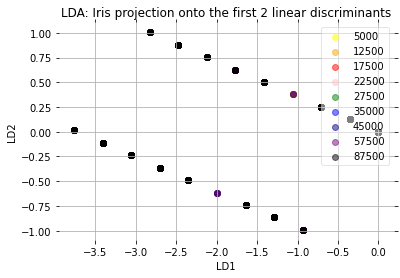

In [39]:
X_lda = x.dot(W)

def plot_lda_by_step():

    ax = plt.subplot(111)
    for label,color in zip(
        range(1,10),('yellow', 'orange', 'red', 'pink', 'green', 'blue','navy', 'purple', 'black')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_lda_by_step()

## Apprentissage non supervisé 

### ACP

In [40]:
income_ = income_final[['INCOME','SEX']]

In [47]:
#Ce code fonctionne une fois sur deux et je ne sais pourquoi
#Il me dit d'essayer d'utiliser .loc, mais .loc ne fonctionne pas

X_inc = income_.drop('SEX', axis=1)
y_inc = income_['SEX']

# étape 1
from sklearn.decomposition import PCA

# étape 2
model = PCA(n_components=2)

# étape 4
model.fit(X_inc)

# étape 5
X_2D = model.transform(X_inc)

income_['PCA1'] = X_2D[:, 0]
income_['PCA2'] = X_2D[:, 1]

<ipython-input-47-06565ca266a1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_['PCA1'] = X_2D[:, 0]
<ipython-input-47-06565ca266a1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_['PCA2'] = X_2D[:, 1]


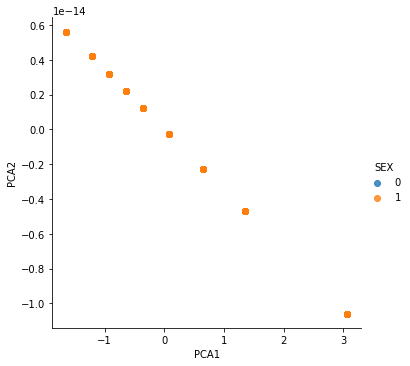

In [48]:
sns.lmplot(x = "PCA1", y = "PCA2", hue='SEX', data=income_, fit_reg=False)

Le code suivant pour l'ACP a été fait à partir d'une vidéo de StatQuest : https://www.youtube.com/watch?v=Lsue2gEM9D0&ab_channel=StatQuestwithJoshStarmer

In [49]:
sex = income_final['SEX'].values
ethn = income_final['ETH'].values
income_sex_eth = pd.DataFrame(columns = ['SEX','ETH'], index=income_final['INCOME'])
income_sex_eth['SEX'] = sex
income_sex_eth['ETH'] = ethn

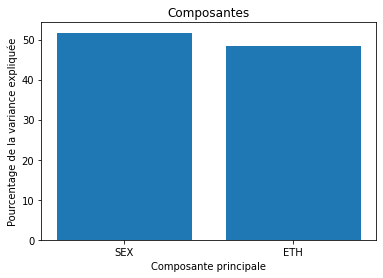

In [50]:
data = preprocessing.scale(income_sex_eth)
pca = PCA()
pca.fit(data)
pca_data = pca.transform(data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['SEX','ETH']

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Pourcentage de la variance expliquée')
plt.xlabel('Composante principale')
plt.title('Composantes')
plt.show()

In [51]:
print(per_var[0])
print(per_var[1])

51.7
48.3


On voit que les composantes expliquent à peu près la même variance de la variable salaire, mais que la variable sex est un petit peu meilleure.

## Rapport

### Résultats

Comme on s'y attendait, les résultats des deux hypothèses sont significatifs. On peut donc affirmer que le sexe (t=-3.5, p<0.001) et la classe ethnique (F=5.59, p<0.001) influencent le salaire de façon significative. 

### Durée nécessaire au projet

Heureusement, le projet a pris beaucoup moins de temps que prévu. En tout, une quinzaine d'heures ont été nécessaires pour faire fonctionner le code. Ces heures ont été réparties sur trois jours. Évidemment, ce temps ne prend pas en considération le temps qui a été mis sur le cours, les exercices et l'étude du code de façon hebdomadaire suite au cours. 

### Approche personnelle quant au projet

La motivation connait des hauts et des bas. Le fait de ne pas avoir pu travailler sur le travail pendant plusieurs semaines a causé beaucoup de stress. J'ai finalement pu travailler sur le projet en fin de session, ce qui est toujours plus difficile au niveau du temps et de la motivation. J'ai donc dû retrouver la motivation initiale que j'avais face au projet. Au final, je trouve que la programmation peut être très valorisante et j'ai apprécié faire ce projet. 

### Retour sur les hypothèses

Les résultats permettent de confirmer les hypothèses selon lesquelles le sexe et la classe ethnique influencent le salaire. Ces résultats sont cohérents avec la réalité de la société dans laquelle nous évoluons. Les données seront comme prévues transmises aux gestionnaires du site payscale qui pourront les mettre à jour et continuer leur visée de sensibilisation quant aux inégalités relatives au salaire. 

### Défis avec le projet

Un des défis avec le projet a été de perdre le code réalisé pour le plan de travail et les problèmes rencontrés avec mon ordinateur. Je n'ai pas pu travaillé sur le projet pendant plusieurs semaines, puis j'ai rencontré un problème au niveau de l'installation de Scikit Learn. J'ai donc eu beaucoup moins de temps que prévu pour la réalisation du projet. Heureusement, le défi attendu concernant l'encodage des valeurs n'a pas été rencontré puisque cette notion a été apprise dans le cadre du cours. Il n'y a donc pas vraiment eu de défis pour l'accomplissement du projet en tant que tel, mais plutôt des problèmes techniques avec l'ordinateur utilisé pour le faire.  